In [1]:
# Load project functions
import crypto_monetary_base as cmb

In [2]:
import pandas as pd
import datetime
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set()
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.labelpad'] = 10
mpl.rc('text', usetex=True)
plt.style.use('ggplot')

from IPython.display import display

In [3]:
%load_ext version_information
%version_information pandas, matplotlib, seaborn

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.4.0
OS Darwin 16.7.0 x86_64 i386 64bit
pandas 0.23.0
matplotlib 2.2.2
seaborn 0.9.0
Thu Jan 03 01:08:03 2019 EST

## Supply Curve Calculation

In [4]:
COIN_SYMBOL = 'EOS'

In [5]:
def datetime_eos_supply_curve(num_weeks):
    supply = [
        # Total distribution,
    ]
    start_date = datetime.datetime(2017, 7, 1)
    y = 900 * 1e6
    weekly_distribution = 100 * 1e6 / (10 * 52)
    supply.append([y])
    for week in range(num_weeks):
        if week < (10 * 52):
            y += weekly_distribution
        supply.append([y])
    
    df = pd.DataFrame(
        supply, columns=['total_supply']
    )
    df['total_supply_pct'] = (
        df['total_supply'] / df['total_supply'].values[-1]
        * 100
    )
    df['date'] = pd.date_range(
        start=start_date,
        freq='W',
        periods=len(df)
    )
    return df

,total_supply,total_supply_pct,date
0,9.000000e+08,90.000000,2017-07-02
1,9.001923e+08,90.019231,2017-07-09
2,9.003846e+08,90.038462,2017-07-16
3,9.005769e+08,90.057692,2017-07-23
4,9.007692e+08,90.076923,2017-07-30


,total_supply,total_supply_pct,date
1196,1.000000e+09,100.0,2040-06-03
1197,1.000000e+09,100.0,2040-06-10
1198,1.000000e+09,100.0,2040-06-17
1199,1.000000e+09,100.0,2040-06-24
1200,1.000000e+09,100.0,2040-07-01


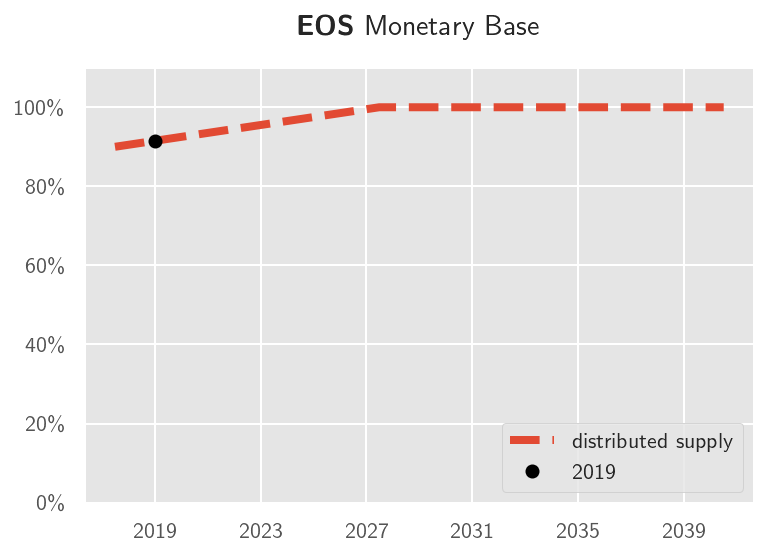

In [6]:
supply = datetime_eos_supply_curve(num_weeks=1200)

display(supply.head())
display(supply.tail())

cmb.plot_supply_curve(
    supply,
    'EOS',
    fmt='--',
    out_name='EOS',
    ylim=(0, 110),
);

## Standardize Time Series

In [7]:
weekly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='weekly')

display(weekly_supply.head())
display(weekly_supply.tail())

Wrote 1201 lines to file ../output-data/EOS_weekly.csv


,coin,total_supply,total_supply_pct,date
0,EOS,9.000000e+08,90.000000,2017-07-01
1,EOS,9.001923e+08,90.019231,2017-07-01
2,EOS,9.003846e+08,90.038462,2017-07-01
3,EOS,9.005769e+08,90.057692,2017-07-01
4,EOS,9.007692e+08,90.076923,2017-07-01


,coin,total_supply,total_supply_pct,date
1196,EOS,1.000000e+09,100.0,2040-06-01
1197,EOS,1.000000e+09,100.0,2040-06-01
1198,EOS,1.000000e+09,100.0,2040-06-01
1199,EOS,1.000000e+09,100.0,2040-06-01
1200,EOS,1.000000e+09,100.0,2040-07-01


In [8]:
monthly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='monthly')

display(monthly_supply.head())
display(monthly_supply.tail())

Wrote 277 lines to file ../output-data/EOS_monthly.csv


,coin,total_supply,total_supply_pct,date
0,EOS,9.000000e+08,90.000000,2017-07-01
1,EOS,9.009615e+08,90.096154,2017-08-01
2,EOS,9.017308e+08,90.173077,2017-09-01
3,EOS,9.025000e+08,90.250000,2017-10-01
4,EOS,9.034615e+08,90.346154,2017-11-01


,coin,total_supply,total_supply_pct,date
272,EOS,1.000000e+09,100.0,2040-03-01
273,EOS,1.000000e+09,100.0,2040-04-01
274,EOS,1.000000e+09,100.0,2040-05-01
275,EOS,1.000000e+09,100.0,2040-06-01
276,EOS,1.000000e+09,100.0,2040-07-01


In [9]:
yearly_supply = cmb.transform_supply(supply, COIN_SYMBOL, freq='yearly')

display(yearly_supply.head())
display(yearly_supply.tail())

Wrote 24 lines to file ../output-data/EOS_yearly.csv


,coin,total_supply,total_supply_pct,date
0,EOS,9.000000e+08,90.000000,2017-07-01
1,EOS,9.051923e+08,90.519231,2018-01-01
2,EOS,9.151923e+08,91.519231,2019-01-01
3,EOS,9.251923e+08,92.519231,2020-01-01
4,EOS,9.351923e+08,93.519231,2021-01-01


,coin,total_supply,total_supply_pct,date
19,EOS,1.000000e+09,100.0,2036-01-01
20,EOS,1.000000e+09,100.0,2037-01-01
21,EOS,1.000000e+09,100.0,2038-01-01
22,EOS,1.000000e+09,100.0,2039-01-01
23,EOS,1.000000e+09,100.0,2040-01-01
